In [1]:
import pandas as pd

In [2]:
# تحميل البيانات
df = pd.read_csv(r"C:\Users\Zeina Hamouie\Downloads\spam-text.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# عرض معلومات عامة عن البيانات (عدد الصفوف والأعمدة، أنواع البيانات، القيم المفقودة)
print('\nمعلومات عامة عن البيانات:')
print(df.info())


معلومات عامة عن البيانات:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [4]:
# عرض الإحصائيات الوصفية للبيانات
print('\nالإحصائيات الوصفية للبيانات:')
print(df.describe())


الإحصائيات الوصفية للبيانات:
       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30


In [5]:
# فحص القيم الفارغة
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


In [6]:
# التحقق من وجود قيم مكررة
print("\nعدد الصفوف المكررة قبل الإزالة:", df.duplicated().sum())


عدد الصفوف المكررة قبل الإزالة: 415


In [7]:
# إزالة الصفوف المكررة
df.drop_duplicates(inplace=True)
# التحقق بعد الإزالة
print("عدد الصفوف بعد إزالة المكررة:", len(df))

عدد الصفوف بعد إزالة المكررة: 5157


لماذا تم حذف هذه الصفوف المكررة؟
 لأن وجود البيانات المكررة يمكن أن يؤدي إلى نتائج غير دقيقة عند بناء نموذج تعلم آلي 
التحيز: إذا تكررت رسالة معينة (مثل "مكافأة فورية!") 100 مرة، سيعتقد النموذج أن هذا النوع من الرسائل شائع جدًا وله أهمية أكبر مما يستحق. 
هذا يجعل النموذج متحيزًا تجاه هذه الرسالة، وقد يصنفها بشكل خاطئ أو يعطيها وزنًا غير حقيقي. 
تضخيم الأداء: عند تقييم أداء النموذج، قد يبدو أنه جيد جدًا لأنه يتعرف على هذه الرسائل المكررة بسهولة. لكن هذا الأداء يكون مزيفًا، لأنه لم يتم اختباره على بيانات جديدة وفريدة تدهور 
جودة البيانات: البيانات المكررة لا تضيف أي معلومات جديدة للنموذج. هي مجرد تكرار لمعلومات موجودة بالفعل، مما يجعل مجموعة البيانات أكبر حجمًا بدون فائدة حقيقية


In [8]:
# التحقق من توزيع الفئات (spam/ham)
print("\nتوزيع الفئات:")
print(df["Category"].value_counts())


توزيع الفئات:
Category
ham     4516
spam     641
Name: count, dtype: int64


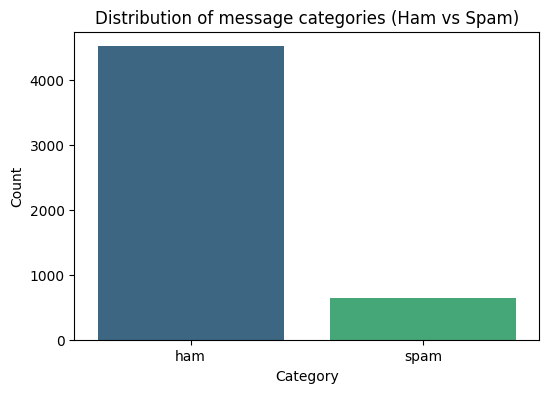

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# تمثيل توزيع الفئات بيانيًا
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df, hue='Category', palette='viridis', legend=False)
plt.title('Distribution of message categories (Ham vs Spam)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

يوضح الرسم البياني أعلاه التوزيع غير المتوازن للفئات بشكل مرئي. 
نرى بوضوح أن عدد رسائل ham (غير المزعجة) يفوق بكثير عدد رسائل spam (المزعجة). هذا يستدعي الانتباه عند اختيار مقاييس التقييم للنموذج (مثل F1-score أو (Precision/Recall بدلاً من الدقة البسيطة Accuracy هذه المقاييس تعطي صورة أكثر واقعية عن أداء النموذج، خاصة مع الفئات الأقل عددًا، وتكشف إن كان النموذج يفشل في التعرف على الفئة التي تهمنا في هذه الحالة رسائل spam


In [10]:
# إضافة عمود جديد لطول الرسالة
df["Message_Length"] = df["Message"].apply(len)

هل يجب أن نحسب طول الرسالة بعد تنظيفها أم قبل ذلك؟
في حالتنا، من الأفضل حساب طول الرسالة قبل تنظيفها و السبب:
القيمة التنبؤية لطول الرسالة الخام (Raw Length)
الهدف من ميزة Message_Length هو قياس الكمية الإجمالية للمعلومات في الرسالة، بما في ذلك الأرقام، علامات الترقيم، والمسافات الزائدة. هذه العناصر، على الرغم من أنها قد تُزال في مرحلة TF-IDF، إلا أنها قد تكون مؤشرًا قويًا على أن الرسالة هي رسالة مزعجة (spam).
رسائل البريد المزعج (Spam): غالبًا ما تستخدم أرقامًا (مثل أرقام الهواتف أو الرموز الترويجية)، علامات ترقيم متعددة (مثل !!! أو $$$)، ومساحات زائدة لجذب الانتباه. هذه العناصر تزيد من طول الرسالة الخام.
الرسائل العادية (Ham): تكون عادةً أكثر بساطة، بأرقام وعلامات ترقيم أقل، ومسافات منظمة.
إذا قمت بحساب الطول بعد تنظيف الرسالة (إزالة الأرقام، علامات الترقيم، والمسافات الزائدة)، فإني سأفقد هذه المعلومات القيمة. ستبدو رسالة "Winner! Get $100,000 now!!!" ورسالة "Winner" بنفس الطول تقريباً، مما يفقد النموذج مؤشرًا قويًا للتصنيف.


In [11]:
# عرض الإحصائيات الوصفية لطول الرسالة لكل فئة
print("\nالإحصائيات الوصفية لطول الرسالة حسب الفئة:\n")
print(df.groupby("Category")["Message_Length"].describe())


الإحصائيات الوصفية لطول الرسالة حسب الفئة:

           count        mean        std  min    25%    50%    75%    max
Category                                                                
ham       4516.0   70.869353  56.708301  2.0   34.0   53.0   91.0  910.0
spam       641.0  137.118565  30.399707  7.0  130.0  148.0  157.0  223.0


النتائج تُظهر إحصائيات طول الرسائل (Message_Length) لكل من فئتي ham و spam بشكل منفصل. 
لدينا 4516 رسالة عادية و641 رسالة مزعجة 
المتوسط: متوسط طول الرسائل العادية هو 70.86 حرفًا بينما متوسط طول الرسائل المزعجة هو 137.11 حرفًا. هذا هو الاستنتاج الأهم، متوسط طول رسائل spam هو ضعف متوسط طول رسائل ham 
الانحراف المعياري: مدى تشتت الأطوال عن المتوسط. ham: لديها انحراف معياري كبير (56.7)، مما يعني أن أطوال الرسائل العادية تتنوع بشكل كبير (بعضها قصير جدًا وبعضها طويل جدًا ( بينما  Spam  لديها انحراف معياري أقل (30.3)، مما يعني أن أطوال الرسائل المزعجة أكثر تشابهًا وتتجمع حول المتوسط. 
كيف يمكنني الاستفادة من هذه النتائج؟
هذه النتائج تُعطينا ميزة كبيرة عند بناء النموذج. بما أن هناك فرقًا واضحًا في متوسط طول الرسائل بين الفئتين، فإن طول الرسالة يعتبر مؤشرًا جيدًا للتنبؤ. يمكنني استخدام طول الرسالة كميزة (feature) إضافية لتديب النموذج


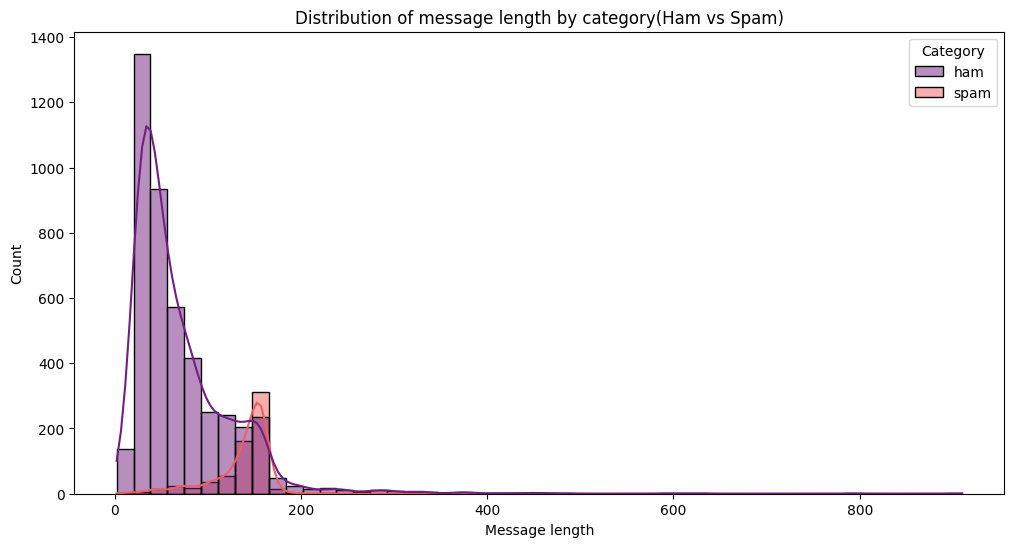

In [12]:
# تمثيل توزيع طول الرسائل لكل فئة بيانيًا
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Message_Length", hue="Category", kde=True, palette="magma",bins=50)
plt.title("Distribution of message length by category(Ham vs Spam)")
plt.xlabel("Message length")
plt.ylabel("Count")
plt.show()

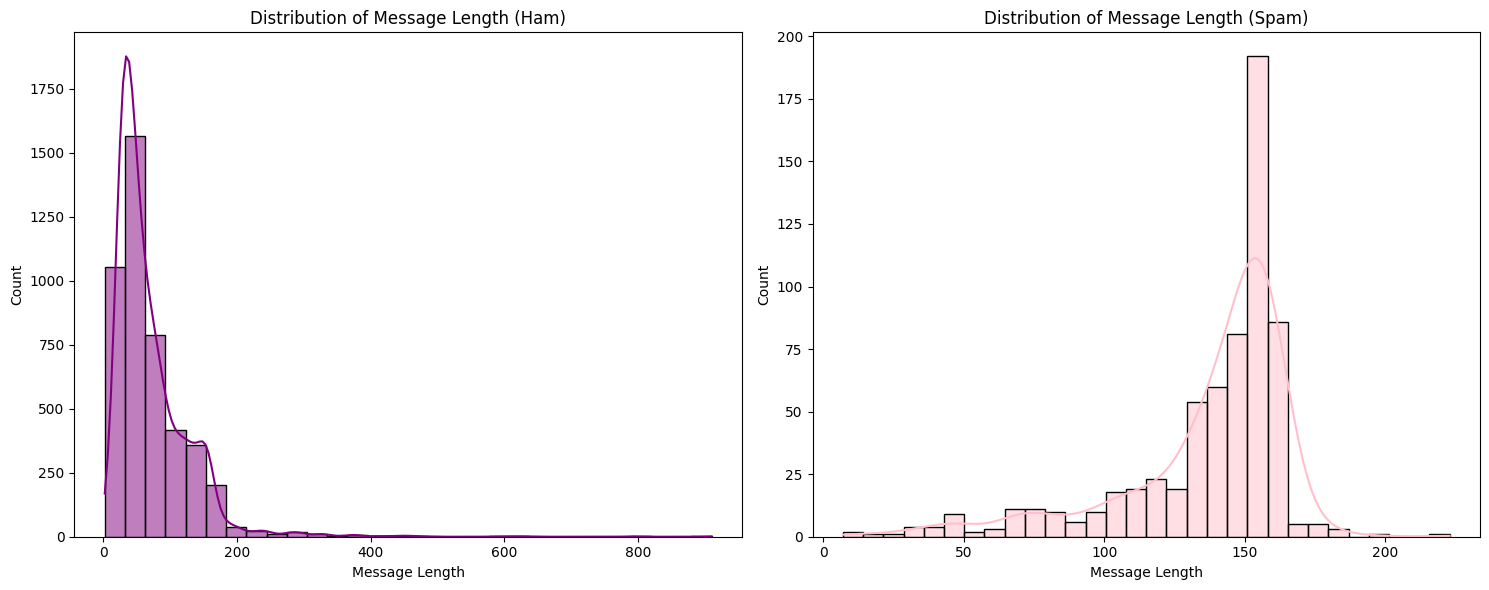

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# إنشاء إطارين للرسم البياني (مخططين) في صف واحد
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# المخطط الأول: لرسائل ham
sns.histplot(data=df[df['Category'] == 'ham'], x="Message_Length", kde=True, ax=axes[0], color='purple',bins=30)
axes[0].set_title("Distribution of Message Length (Ham)")
axes[0].set_xlabel("Message Length")
axes[0].set_ylabel("Count")

# المخطط الثاني: لرسائل spam
sns.histplot(data=df[df['Category'] == 'spam'], x="Message_Length", kde=True, ax=axes[1], color='pink',bins=30)
axes[1].set_title("Distribution of Message Length (Spam)")
axes[1].set_xlabel("Message Length")
axes[1].set_ylabel("Count")

# تعديل المسافات بين المخططات
plt.tight_layout()

# عرض المخططات
plt.show()

تفسير المخطط الأول لرسائل Ham - على اليسار-  شكل التوزيع: 
التوزيع هنا منحرف بشدة نحو اليمين (Right-skewed) 
القمة الرئيسية للمخطط تقع عند نقطة قريبة جدًا من الصفر، مما يدل على أن العدد الأكبر من رسائل ham هي رسائل قصيرة جدًا. الذيل (Tail): يمتد التوزيع على نطاق واسع جدًا ليشمل رسائل طويلة، لكن عدد هذه الرسائل الطويلة يقل بشكل كبير كلما زاد الطول.
الاستنتاج: معظم الرسائل العادية قصيرة، لكن هناك مجموعة صغيرة من الرسائل العادية يمكن أن تكون طويلة جدًا. 
تفسير المخطط الثاني (لرسائل Spam - على اليمين): شكل التوزيع: التوزيع هنا يشبه إلى حد كبير التوزيع الطبيعي (Normal Distribution) وهو أكثر تماثلًا من مخطط ham
 القمة (Peak): القمة الرئيسية للمخطط تقع عند نقطة تتراوح بين 150 و 175 حرفًا تقريبًا. هذا يدل على أن أطوال الرسائل المزعجة تتركز في نطاق معين، وهو أطول بكثير من غالبية رسائل ham
الذيل (Tail): لا يمتد التوزيع على نطاق واسع جدًا مثل رسائل ham، بل يظل محصورًا في نطاق محدود. 
الاستنتاج: الرسائل المزعجة لها طول "نموذجي" أو "مفضل" يقع في نطاق متوسط الطول. نادرًا ما تكون الرسائل المزعجة قصيرة جدًا أو طويلة جدًا. هذه الرسوم البيانية المنفصلة تؤكد بشكل قاطع أن طول الرسالة هو ميزة تمييزية قوية جدًا. 
يمكننا أن نستنتج أن أي رسالة قصيرة جدًا (مثلاً، أقل من 50 حرفًا) هي على الأرجح ham. بينما أي رسالة يقع طولها في نطاق 100 إلى 200 حرف (وخاصةً حول 150 حرفًا) هي على أرجح spam.


In [14]:
import string
import re
# Text Normalization
# تنظيف النصوص
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # إزالة الأرقام
    text = text.translate(str.maketrans('', '', string.punctuation))  # إزالة علامات الترقيم
    text = re.sub(r'\s+', ' ', text).strip()  # إزالة المسافات الزائدة
    return text

df['Clean_Message'] = df['Message'].apply(clean_text)
df.head()

,Category,Message,Message_Length,Clean_Message
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i dont think he goes to usf he lives aroun...


In [15]:
from sklearn.preprocessing import LabelEncoder
# تحويل الفئة (Category) من نصية إلى رقمية (ham=0, spam=1)
encoder = LabelEncoder()
df["Category_Encoded"] = encoder.fit_transform(df["Category"])


In [16]:
# الآن، لفحص الترميز:
print("الفئات التي تم ترميزها والترتيب المقابل لها:")
print(encoder.classes_)

# يمكنك أيضًا التحقق من الترميز لكل فئة
mapping_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("\nالخريطة النهائية للترميز:")
print(mapping_dict)

الفئات التي تم ترميزها والترتيب المقابل لها:
['ham' 'spam']

الخريطة النهائية للترميز:
{'ham': 0, 'spam': 1}


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

#  تحويل النصوص إلى ميزات رقمية باستخدام TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(df["Clean_Message"])

#  خطوة جديدة: دمج ميزة الطول مع مصفوفة TF-IDF
# نحول عمود الطول إلى مصفوفة متفرقة (sparse matrix)
X_length = df["Message_Length"].values.reshape(-1, 1)

# دمج مصفوفة TF-IDF مع ميزة طول الرسالة
X = hstack([X_tfidf, X_length])
y = df["Category_Encoded"]


In [18]:
print("شكل مصفوفة الميزات (X):", X.shape)
print("شكل متجه الفئات (y):", y.shape)

شكل مصفوفة الميزات (X): (5157, 5001)
شكل متجه الفئات (y): (5157,)


شكل مصفوفة الميزات (X): (5157, 5001)
5157: هذا هو عدد العينات (الرسائل) في مجموعة البيانات الخاصة بنا بعد إزالة التكرارات، وهو متطابق مع عدد الصفوف الذي رأيناه سابقًا. هذا يؤكد أننا لم نفقد أي بيانات في هذه المرحلة.
5001: هذا هو عدد الميزات الإجمالي. وهو يتكون من:
5000 ميزة من TfidfVectorizer (لأنكِ حددتِ max_features=5000).
1 ميزة إضافية وهي Message_Length التي قمتِ بدمجها.
هذا الشكل يؤكد أن عملية دمج الميزات تمت بنجاح.
شكل متجه الفئات (y): (5157,)
هذا الشكل يوضح أن لدينا متجهًا واحدًا يحتوي على 5157 من التصنيفات (labels)، وهو يطابق تمامًا عدد العينات في مصفوفة الميزات X.


In [19]:
from sklearn.model_selection import train_test_split
# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print("شكل مجموعة التدريب (X_train):", X_train.shape)
print("شكل مجموعة الاختبار (X_test):", X_test.shape)

شكل مجموعة التدريب (X_train): (4125, 5001)
شكل مجموعة الاختبار (X_test): (1032, 5001)


In [20]:
from sklearn.linear_model import LogisticRegression

# 1. إنشاء نموذج الانحدار اللوجستي
# نستخدم class_weight='balanced' للتعامل مع عدم توازن الفئات تلقائياً
# solver='liblinear' هو خيار جيد للمصفوفات المتناثرة
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# 2. تدريب النموذج على بيانات التدريب
print("بدء تدريب النموذج")
model.fit(X_train, y_train)
print("تم التدريب بنجاح\n")


# 3. الحصول على احتمالات التنبؤ (بدلاً من التنبؤات المباشرة)
# هذا هو المفتاح لتجربة عتبات مختلفة
# predict_proba يعطينا احتمالية كل فئة (مثلاً، [احتمالية ham, احتمالية spam])
probas = model.predict_proba(X_test)
print("الاحتماليات (Sigmoid):", probas)

بدء تدريب النموذج
تم التدريب بنجاح

الاحتماليات (Sigmoid): [[0.43119285 0.56880715]
 [0.1681481  0.8318519 ]
 [0.94055718 0.05944282]
 ...
 [0.96427547 0.03572453]
 [0.93619353 0.06380647]
 [0.62852871 0.37147129]]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 4. تجربة عدة قيم للعتبة وتقييم الأداء لكل عتبة
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

print("--- تقييم الأداء بناءً على عتبات مختلفة ---")

for threshold in thresholds:
    # 5. تطبيق العتبة المخصصة لتحويل الاحتمالات إلى تنبؤات ثنائية (0 أو 1)
    # probas[:, 1] هي احتمالات أن تكون الرسالة من فئة spam
    y_pred_custom = (probas[:, 1] > threshold).astype(int)
    
    print(f"\nالأداء عند العتبة = {threshold}:")
     # 6. قياس المقاييس
    # y_test هي التصنيفات الحقيقية، y_pred_custom هي تنبؤاتنا
    accuracy = accuracy_score(y_test, y_pred_custom)
    precision = precision_score(y_test, y_pred_custom, pos_label=1)
    recall = recall_score(y_test, y_pred_custom, pos_label=1)
    f1 = f1_score(y_test, y_pred_custom, pos_label=1)
    
    print(f"  الدقة (Accuracy):  {accuracy:.4f}")
    print(f"  الدقة (Precision): {precision:.4f}")
    print(f"  الاستدعاء (Recall): {recall:.4f}")
    print(f"  F1-Score:        {f1:.4f}")

--- تقييم الأداء بناءً على عتبات مختلفة ---

الأداء عند العتبة = 0.1:
  الدقة (Accuracy):  0.6609
  الدقة (Precision): 0.2780
  الاستدعاء (Recall): 0.9853
  F1-Score:        0.4337

الأداء عند العتبة = 0.3:
  الدقة (Accuracy):  0.9079
  الدقة (Precision): 0.5928
  الاستدعاء (Recall): 0.9632
  F1-Score:        0.7339

الأداء عند العتبة = 0.5:
  الدقة (Accuracy):  0.9545
  الدقة (Precision): 0.7697
  الاستدعاء (Recall): 0.9338
  F1-Score:        0.8439

الأداء عند العتبة = 0.7:
  الدقة (Accuracy):  0.9651
  الدقة (Precision): 0.8623
  الاستدعاء (Recall): 0.8750
  F1-Score:        0.8686

الأداء عند العتبة = 0.9:
  الدقة (Accuracy):  0.9312
  الدقة (Precision): 0.9221
  الاستدعاء (Recall): 0.5221
  F1-Score:        0.6667


نتذكر دائمًا أن الهدف هو تصنيف رسائل  spam الفئة 1
Precision (الدقة: إذا قال النموذج "هذه رسالة Spam"، ما مدى ثقتنا بأنه على حق؟ (جودة التنبؤات الإيجابية).
Recall (الاستدعاء: من بين كل رسائل الـ Spam الحقيقية، كم عدد الرسائل التي نجح النموذج في "اصطيادها"؟ (كمية التنبؤات الإيجابية الصحيحة)ض.
________________________________________
1. العتبة = 0.1 (النموذج المتساهل جدًا)
السلوك: النموذج هنا "متوتر" جدًا. أي رسالة لديها حتى 10% فرصة لتكون spam، سيصنفها على أنها spam.
النتائج:
Recall: 0.9853 (ممتاز): نجح في اصطياد 98.5%  من كل رسائل السبام الحقيقية. لم يفوّت أي شيء تقريبًا.
Precision: 0.2780 (سيء جدًا): عندما قال "هذه سبام"، كان على حق فقط في 27.8% من الحالات. هذا يعني أنه أخطأ وصنف الكثير من رسائل  ham العادية على أنها spam.
الخلاصة: هذا النموذج يحمينا من كل السبام، لكنه مزعج جدًا لأنه يملأ صندوق البريد المزعج برسائل مهمة. غير قابل للاستخدام.
2. العتبة = 0.3 (النموذج الحذر)
السلوك: أكثر توازنًا بقليل، لكنه لا يزال يميل إلى تصنيف الرسائل كـ spam بسهولة.
النتائج:
Recall: 0.9632 (لا يزال ممتازًا): ما زال يلتقط الغالبية العظمى من رسائل السبام.
Precision: 0.5928 (تحسن كبير): أصبح أكثر دقة، لكنه لا يزال يخطئ في حوالي 40% من تنبؤاته.
F1-Score: 0.7339: مقياس F1 (الذي يوازن بين Precision و Recall) تحسن بشكل كبير.
3. العتبة = 0.5 (العتبة الافتراضية - نقطة انطلاق جيدة)
السلوك: النقطة المرجعية القياسية. يصنف الرسالة كـ spam إذا كانت احتمالية كونها spam أكبر من احتمالية كونها ham.
النتائج:
Recall: 0.9338 (جيد جدًا): لا يزال يكتشف 93% من السبام.
Precision: 0.7697 (جيد): عندما يصنف رسالة كـ spam، يكون على حق في 77% من الحالات.
F1-Score: 0.8439: توازن جيد جدًا بين الدقة والاستدعاء.
4. العتبة = 0.7 (النموذج المتوازن والأفضل على الأرجح)
السلوك: النموذج هنا أكثر "ثقة". لا يصنف الرسالة كـ spam إلا إذا كان متأكدًا بنسبة 70% على الأقل.
النتائج:
Recall: 0.8750 (جيد): بدأ يفوت بعض رسائل السبام (حوالي 12.5% منها ستصل إلى بريدك الوارد)، لكنه لا يزال يكتشف الأغلبية.
Precision: 0.8623 (جيد جدًا): أصبح أكثر جدارة بالثقة. عندما يقول "سبام"، فهو على حق بنسبة 86%.
F1-Score: 0.8686 (الأعلى!): هذه هي أعلى قيمة F1-score، مما يشير إلى أن هذه العتبة تقدم أفضل توازن شامل بين عدم تفويت رسائل السبام (Recall) وعدم تصنيف الرسائل العادية بشكل خاطئ (Precision).
5. العتبة = 0.9 (النموذج المتشدد جدًا)
السلوك: النموذج "شكاك" للغاية. لن يصنف أي شيء كـ spam إلا إذا كان متأكدًا بنسبة 90%
النتائج:
Recall: 0.5221 (سيء): فشل في اكتشاف ما يقرب من نصف رسائل السبام الحقيقية. الكثير من السبام سيتسلل إلى صندوق الوارد الخاص بك.
Precision: 0.9221 (ممتاز): لكن عندما يتخذ قرارًا، فهو صحيح دائمًا تقريبًا. إذا قال "سبام"، يمكنك الوثوق به تمامًا.
الخلاصة: هذا النموذج آمن جدًا من حيث عدم ارتكاب أخطاء، لكنه غير فعال في حمايتك.
________________________________________
الاستنتاج النهائي: ما هي أفضل عتبة؟
بناءً على هذه النتائج، العتبة 0.7 تبدو هي الخيار الأمثل.
لماذا؟ لأنها تحقق أعلى F1-Score (0.8686)، مما يعني أنها توفر أفضل حل وسط بين:
التقاط عدد كبير من رسائل السبام (Recall جيد).
الحفاظ على ثقة المستخدم عن طريق عدم ارتكاب الكثير من الأخطاء (Precision جيد جدًا).


لا يمكن استخدام  cross_val_score بشكل مباشر لتقييم العتبات المختلفة. الحل هو بناء حلقة تقييم متقاطع يدوية (Manual Cross-Validation Loop)
في هذا الكود، سنقوم بما يلي:
نقوم بتقسيم البيانات إلى طيات (folds) باستخدام StratifiedKFold لضمان أن كل طية تحتوي على نفس نسبة فئات spam  و ham
لكل طية:
نستخدم جزءًا من البيانات للتدريب.
نستخدم الجزء المتبقي للتقييم.
نحصل على احتمالات التنبؤ للجزء المخصص للتقييم.
نطبق العتبات المختلفة على هذه الاحتمالات.
نحسب جميع المقاييس (Precision, Recall, F1-score).
في النهاية، نقوم بحساب متوسط المقاييس لجميع الطيات، مما يعطينا تقييمًا موثوقًا لأداء كل عتبة.


In [23]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

X = X.tocsr()
# 1. تحديد العتبات التي نريد اختبارها
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

# 2. إعداد التقييم المتقاطع (Stratified K-Fold)
# نستخدم 5 طيات
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. إعداد نموذج الانحدار اللوجستي
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# 4. قواميس لتخزين النتائج لكل عتبة
results = {
    'accuracy': {thr: [] for thr in thresholds},
    'precision': {thr: [] for thr in thresholds},
    'recall': {thr: [] for thr in thresholds},
    'f1': {thr: [] for thr in thresholds}
}

# 5. حلقة التقييم المتقاطع الرئيسية
print("--- بدء التقييم المتقاطع لجميع العتبات ---")
for fold, (train_index, test_index) in enumerate(cv.split(X, y)):
    #print(f"|--- الطية رقم {fold+1} ---|")
    
    # تقسيم البيانات في كل طية
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # تدريب النموذج على بيانات التدريب للطية الحالية
    model.fit(X_train, y_train)
    
    # الحصول على احتمالات التنبؤ لبيانات الاختبار
    probas_spam = model.predict_proba(X_test)[:, 1]
    
    # تقييم أداء كل عتبة على بيانات الاختبار لهذه الطية
    for threshold in thresholds:
        y_pred = (probas_spam >= threshold).astype(int)
        
        # حساب المقاييس وتخزينها
        results['accuracy'][threshold].append(accuracy_score(y_test, y_pred))
        results['precision'][threshold].append(precision_score(y_test, y_pred, zero_division=0))
        results['recall'][threshold].append(recall_score(y_test, y_pred, zero_division=0))
        results['f1'][threshold].append(f1_score(y_test, y_pred, zero_division=0))

# 6. طباعة متوسط النتائج لكل عتبة
print("\n--- النتائج النهائية بعد التقييم المتقاطع ---")
for threshold in thresholds:
    print(f"\nالأداء عند العتبة = {threshold}:")
    print(f"  - متوسط الدقة (Accuracy):  {np.mean(results['accuracy'][threshold]):.4f}")
    print(f"  - متوسط الدقة (Precision): {np.mean(results['precision'][threshold]):.4f}")
    print(f"  - متوسط الاستدعاء (Recall): {np.mean(results['recall'][threshold]):.4f}")
    print(f"  - متوسط F1-Score:        {np.mean(results['f1'][threshold]):.4f}")


--- بدء التقييم المتقاطع لجميع العتبات ---

--- النتائج النهائية بعد التقييم المتقاطع ---

الأداء عند العتبة = 0.1:
  - متوسط الدقة (Accuracy):  0.6539
  - متوسط الدقة (Precision): 0.2635
  - متوسط الاستدعاء (Recall): 0.9938
  - متوسط F1-Score:        0.4165

الأداء عند العتبة = 0.3:
  - متوسط الدقة (Accuracy):  0.9221
  - متوسط الدقة (Precision): 0.6249
  - متوسط الاستدعاء (Recall): 0.9517
  - متوسط F1-Score:        0.7538

الأداء عند العتبة = 0.5:
  - متوسط الدقة (Accuracy):  0.9628
  - متوسط الدقة (Precision): 0.8221
  - متوسط الاستدعاء (Recall): 0.8955
  - متوسط F1-Score:        0.8571

الأداء عند العتبة = 0.7:
  - متوسط الدقة (Accuracy):  0.9659
  - متوسط الدقة (Precision): 0.8993
  - متوسط الاستدعاء (Recall): 0.8175
  - متوسط F1-Score:        0.8563

الأداء عند العتبة = 0.9:
  - متوسط الدقة (Accuracy):  0.9368
  - متوسط الدقة (Precision): 0.9424
  - متوسط الاستدعاء (Recall): 0.5242
  - متوسط F1-Score:        0.6730


قراءة النتائج النهائية
العلاقة العكسية بين Precision و Recall واضحة جدًا هنا ولكن هذه الأرقام أكثر استقرارًا لأنها متوسط أداء النموذج عبر 5 تجارب مختلفة.
عتبة 0.1 و 0.3: لا تزال غير عملية. الـ Recall ممتاز ولكنه يأتي على حساب Precision منخفض جدًا، مما يعني الكثير من الأخطاء في تصنيف الرسائل العادية.
عتبة 0.9: لا تزال متشددة جدًا. الـ Precision شبه مثالي، لكنها تفوت ما يقرب من نصف رسائل السبام (Recall = 0.52)، مما يجعلها غير فعالة.
القرار الحقيقي يقع بين عتبة 0.5 و 0.7.
المعركة النهائية: عتبة 0.5 ضد عتبة 0.7
هنا يصبح القرار استراتيجيًا ويعتمد على "ما هو الأهم بالنسبة لي؟"
الأداء عند العتبة = 0.5:
متوسط F1-Score: 0.8571 (الأعلى)
Precision: 0.8221 (جيد جدًا): عندما يقول "سبام"، فهو على حق بنسبة 82%.
Recall: 0.8955 (ممتاز): ينجح في التقاط حوالي 90% من كل رسائل السبام.
الأداء عند العتبة = 0.7:
متوسط F1-Score: 0.8563 (قريب جدًا من الأعلى)
Precision: 0.8993 (ممتاز): عندما يقول "سبام"، فهو على حق بنسبة 90%. هذا يقلل بشكل كبير من احتمالية إزعاج المستخدم بتصنيف خاطئ.
Recall: 0.8175 (جيد): لكن هذا يأتي على حساب تفويت عدد أكبر من رسائل السبام (حوالي 18% منها ستصل لصندوق الوارد).
اتخاذ القرار النهائي: ما هو الخيار الأفضل؟
بناءً على هذه النتائج الموثوقة، العتبة 0.5 هي الفائزة.
لماذا؟
أعلى F1-Score: من منظور إحصائي بحت، هي تحقق أفضل توازن رياضي بين Precision و Recall
Recall مرتفع جدًا: في معظم تطبيقات فلترة السبام، يُعتبر تفويت رسالة سبام (False Negative) أمرًا مزعجًا، لكن تصنيف رسالة مهمة على أنها سبام (False Positive) يمكن أن يكون كارثيًا (قد تفوتك مقابلة عمل، فاتورة، أو رسالة عائلية). ومع ذلك، فإن الـ Recall عند عتبة 0.5 (حوالي 90%) لا يزال قويًا جدًا ويقدم حماية ممتازة.
توازن عملي: عتبة 0.5 تقدم أفضل "صفقة" شاملة. تحصل على حماية قوية جدًا من السبام (Recall عالٍ) مع الحفاظ على مستوى جيد جدًا من الثقة في التنبؤات (Precision جيد).
بينما تقدم عتبة 0.7 دقة (Precision) أعلى، فإن التضحية في الـ Recall (من 90% إلى 82%) كبيرة جدًا. من الأفضل التقاط المزيد من السبام حتى لو كان ذلك يعني وجود عدد قليل جدًا من الأخطاء الإضافية.



In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler # جيد للبيانات المتناثرة
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import numpy as np

# 1. تعريف المقاييس التي نريد استخدامها
# نستخدم F1-score لأنه أفضل للبيانات غير المتوازنة
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1_score': make_scorer(f1_score, pos_label=1)
}


# 2. إعداد قائمة بالنماذج المراد اختبارها
models = [
    ('Decision Tree (max_depth=10)', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('Naive Bayes (MultinomialNB)', MultinomialNB()), # لا يحتاج تحجيم
    ('Logistic Regression', LogisticRegression(random_state=42, solver='liblinear')), # أقل حساسية، لكن التحجيم لا يضر
    
    # استخدام Pipeline للنماذج الحساسة للمسافة
    ('SVM (linear)', Pipeline([('scaler', MaxAbsScaler()), ('svc', SVC(kernel='linear', random_state=42))])),
    ('SVM (rbf)', Pipeline([('scaler', MaxAbsScaler()), ('svc', SVC(kernel='rbf', random_state=42))])),
    ('KNN (k=3)', Pipeline([('scaler', MaxAbsScaler()), ('knn', KNeighborsClassifier(n_neighbors=3))])),
    ('KNN (k=5)', Pipeline([('scaler', MaxAbsScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])),
]

# 3. إعداد التقييم المتقاطع (StratifiedKFold)
# StratifiedKFold يحافظ على نسبة الفئات في كل fold
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. تشغيل التقييم المتقاطع لجميع النماذج
results = {}
print("بدء التقييم المتقاطع...")
print("-" * 50)

for model_name, model in models:
    print(f"تقييم نموذج: {model_name}")
    model_scores = {}
    
    # حساب كل مقياس على حدة
    for metric_name, scorer in scoring_metrics.items():
        scores = cross_val_score(model, X, y, cv=cv_folds, scoring=scorer, n_jobs=-1)
        model_scores[metric_name] = {
            'mean': np.mean(scores),
            'std': np.std(scores)
        }
    
    results[model_name] = model_scores
    print(f"  - متوسط F1-Score: {model_scores['f1_score']['mean']:.4f} (+/- {model_scores['f1_score']['std']:.4f})")
    print("-" * 50)

# 5. عرض النتائج النهائية في جدول
print("\n--- مقارنة أداء النماذج النهائية (متوسط F1-Score) ---")
final_comparison = pd.DataFrame({
    'Model': [name for name, _ in models],
    'Mean F1-Score': [results[name]['f1_score']['mean'] for name, _ in models],
    'Std F1-Score': [results[name]['f1_score']['std'] for name, _ in models]
})
final_comparison = final_comparison.sort_values(by='Mean F1-Score', ascending=False)
print(final_comparison.to_string(index=False))

بدء التقييم المتقاطع...
--------------------------------------------------
تقييم نموذج: Decision Tree (max_depth=10)
  - متوسط F1-Score: 0.7173 (+/- 0.0072)
--------------------------------------------------
تقييم نموذج: Naive Bayes (MultinomialNB)
  - متوسط F1-Score: 0.1933 (+/- 0.0347)
--------------------------------------------------
تقييم نموذج: Logistic Regression
  - متوسط F1-Score: 0.7829 (+/- 0.0371)
--------------------------------------------------
تقييم نموذج: SVM (linear)
  - متوسط F1-Score: 0.9056 (+/- 0.0192)
--------------------------------------------------
تقييم نموذج: SVM (rbf)
  - متوسط F1-Score: 0.8063 (+/- 0.0278)
--------------------------------------------------
تقييم نموذج: KNN (k=3)
  - متوسط F1-Score: 0.5329 (+/- 0.0309)
--------------------------------------------------
تقييم نموذج: KNN (k=5)
  - متوسط F1-Score: 0.3860 (+/- 0.0384)
--------------------------------------------------

--- مقارنة أداء النماذج النهائية (متوسط F1-Score) ---
                      

التحليل العميق للنتائج:
1.  النموذج الفائز: SVM (linear)
F1-Score: 0.9056
لماذا؟ لقد حدث شيئان هنا:
تحجيم الميزات (Scaling): باستخدام Pipeline و MaxAbsScaler، أعطينا نموذج SVM فرصة عادلة للعمل لأن  Message_Length لم   تهيمن على القرار، وأصبح النموذج قادرًا على استخدام آلاف الميزات النصية من TF-IDF بفعالية.
طبيعة المشكلة: نموذج  SVM الخطي يتألق في مشاكل تصنيف النصوص عالية الأبعاد (high-dimensional) مثل هذه. الفكرة هي أنه في فضاء يحتوي على 5001 بُعد (ميزة)، غالبًا ما يكون من الممكن إيجاد "سطح فاصل" (hyperplane) يمكنه الفصل بين الفئتين (ham و spam) بشكل فعال جدًا.
الاستنتاج: لقد أثبت SVM (linear) أنه النموذج الأقوى لهذه المهمة المحددة، متفوقًا بفارق كبير على جميع المنافسين.
2. الوصيف القوي: SVM (rbf)
F1-Score: 0.8063
لماذا؟ هذا النموذج استفاد أيضًا بشكل كبير من تحجيم الميزات. نواة RBF قادرة على إيجاد حدود قرار معقدة وغير خطية. ومع ذلك، يبدو أن المشكلة في جوهرها "خطية" بما يكفي بحيث كان النموذج الخطي البسيط أكثر فعالية.
3. الأداء المتواضع: Logistic Regression و Decision Tree
Logistic Regression (F1: 0.7829): لا يزال يقدم أداءً جيدًا ومحترمًا، لكنه ببساطة لا يستطيع منافسة قوة SVM في هذا الفضاء عالي الأبعاد.
Decision Tree (F1: 0.7173): أشجار القرار لا تعمل بشكل جيد عادةً مع البيانات المتناثرة جدًا وعالية الأبعاد مثل هذه.
4. الأداء المخيب للآمال: KNN و Naive Bayes
KNN (F1: 0.53 و 0.38): على الرغم من أننا قمنا بتحجيم الميزات، إلا أن KNN يعاني من مشكلة تسمى "لعنة الأبعاد" (Curse of Dimensionality). في فضاء يحتوي على 5001 بُعد، يصبح مفهوم "المسافة" أو "الجوار" أقل معنى. كل النقاط تبدو بعيدة عن بعضها البعض، مما يجعل من الصعب على النموذج العثور على جيران مفيدين.
Naive Bayes (F1: 0.1933): هذا هو الأداء الأسوأ والمفاجئ. غالبًا ما يكون Naive Bayes نقطة انطلاق جيدة لتصنيف النصوص. الأداء الضعيف هنا قد يعود إلى أن أحد الافتراضات الأساسية للنموذج - وهو أن الميزات مستقلة عن بعضها البعض - قد تم انتهاكه بشدة بعد دمج ميزة Message_Length القوية جدًا. أصبح النموذج مرتبكًا بسبب وجود ميزة واحدة (الطول) لها علاقة قوية جدًا بالتصنيف، وهو ما يتعارض مع افتراض الاستقلالية
